## Harmonic Swell Generator (x3)

Cargamos las librerías que necesitaremos.

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Obtener el directorio actual del script
directorio_actual = os.path.dirname(os.path.abspath('disturbance_creator'))
directorio_destino = os.path.join(directorio_actual, 'Harmonic_swell_signals')

# Crear los directorios una vez antes de iniciar el bucle

os.makedirs(os.path.join(directorio_destino, 'test'), exist_ok=True)
os.makedirs(os.path.join(directorio_destino, 'train'), exist_ok=True)
os.makedirs(os.path.join(directorio_destino, 'val'), exist_ok=True)


def harmonic_swell_generator():
    
    total_signals = 3600
    num_iterations = 3  # Triplicar las señales
    signals_per_iteration = total_signals
    total_generated = num_iterations * signals_per_iteration
    
    for iteration in range(3):
        for i in range(3601):
            nombre_archivo = f"or_s_{i}.npy"
            ruta_archivo = os.path.join(directorio_actual, 'original_signal', nombre_archivo)

            if os.path.exists(ruta_archivo):
                print(f"Se encontró el archivo {nombre_archivo}")
                # Cargar los datos desde el archivo .npy
                data = np.load(ruta_archivo)
                # Normalizar la señal RMS
                signal_original = data / np.sqrt(np.mean(data**2))

                # Parámetros del armónico
                # Generar un vector de tiempo (tasa de muestreo de 10,000Hz)
                tiempo = np.arange(len(signal_original)) / 10000
                num_harmonics = np.random.randint(1, 3)  # Generar un número aleatorio de armónicos (de 1 a 2)
                harmonic_amplitude = 0.1  # Amplitud del armónico

                # Generar la señal armónica sumando múltiples armónicos a la señal original
                harmonic_signal = np.zeros_like(signal_original)
                for _ in range(num_harmonics):
                    harmonic_freq = np.random.randint(1, 11) * 50  # Generar un armónico aleatorio entre 50 Hz y 500 Hz
                    harmonic_signal += harmonic_amplitude * np.sin(2 * np.pi * harmonic_freq * tiempo)

                # Parámetros del Swell
                longitud_signal = len(signal_original)
                duracion_amplificacion = np.random.randint(3000, 5000)  # 0.3 a 0.5 segundos aleatoriamente
                factor_amplitud_min = 1.2
                factor_amplitud_max = 1.7

                # Generar la posición aleatoria para la amplificación
                inicio_amplificacion = np.random.randint(0, longitud_signal - duracion_amplificacion)

                # Generar el factor de amplificación aleatorio
                factor_amplitud = np.random.uniform(factor_amplitud_min, factor_amplitud_max)

                # Aplicar la amplificación en la parte aleatoria de la señal original
                signal_sag = np.copy(signal_original)
                signal_sag[inicio_amplificacion:(inicio_amplificacion + duracion_amplificacion)] *= factor_amplitud

                # Sumar la señal armónica y la señal con swell
                signal_with_harmonic = signal_original + harmonic_signal
                signal_with_harmonic_and_swell = np.copy(signal_with_harmonic)
                signal_with_harmonic_and_swell[inicio_amplificacion:(inicio_amplificacion + duracion_amplificacion)] *= (factor_amplitud)

                # Determinar la carpeta de destino
                index_global = iteration * signals_per_iteration + i
                if index_global < 7561:
                    directorio_destino_final = os.path.join(directorio_destino, 'train')
                elif index_global < 9181:
                    directorio_destino_final = os.path.join(directorio_destino, 'test')
                else:
                    directorio_destino_final = os.path.join(directorio_destino, 'val')
                #print('Index global:', index_global)

                nombre_archivo_nuevo = f"hrc_sw_s_{index_global}.npy"
                ruta_archivo_nuevo = os.path.join(directorio_destino_final, nombre_archivo_nuevo)
                np.save(ruta_archivo_nuevo, signal_with_harmonic_and_swell)
                print(f"Señal con armónico y Swell guardada en {nombre_archivo_nuevo}")

            else:
                print("archivo no encontrado")


harmonic_swell_generator()

archivo no encontrado
Se encontró el archivo or_s_1.npy
Señal con armónico y Swell guardada en hrc_sw_s_1.npy
Se encontró el archivo or_s_2.npy
Señal con armónico y Swell guardada en hrc_sw_s_2.npy
Se encontró el archivo or_s_3.npy
Señal con armónico y Swell guardada en hrc_sw_s_3.npy
Se encontró el archivo or_s_4.npy
Señal con armónico y Swell guardada en hrc_sw_s_4.npy
Se encontró el archivo or_s_5.npy
Señal con armónico y Swell guardada en hrc_sw_s_5.npy
Se encontró el archivo or_s_6.npy
Señal con armónico y Swell guardada en hrc_sw_s_6.npy
Se encontró el archivo or_s_7.npy
Señal con armónico y Swell guardada en hrc_sw_s_7.npy
Se encontró el archivo or_s_8.npy
Señal con armónico y Swell guardada en hrc_sw_s_8.npy
Se encontró el archivo or_s_9.npy
Señal con armónico y Swell guardada en hrc_sw_s_9.npy
Se encontró el archivo or_s_10.npy
Señal con armónico y Swell guardada en hrc_sw_s_10.npy
Se encontró el archivo or_s_11.npy
Señal con armónico y Swell guardada en hrc_sw_s_11.npy
Se enc

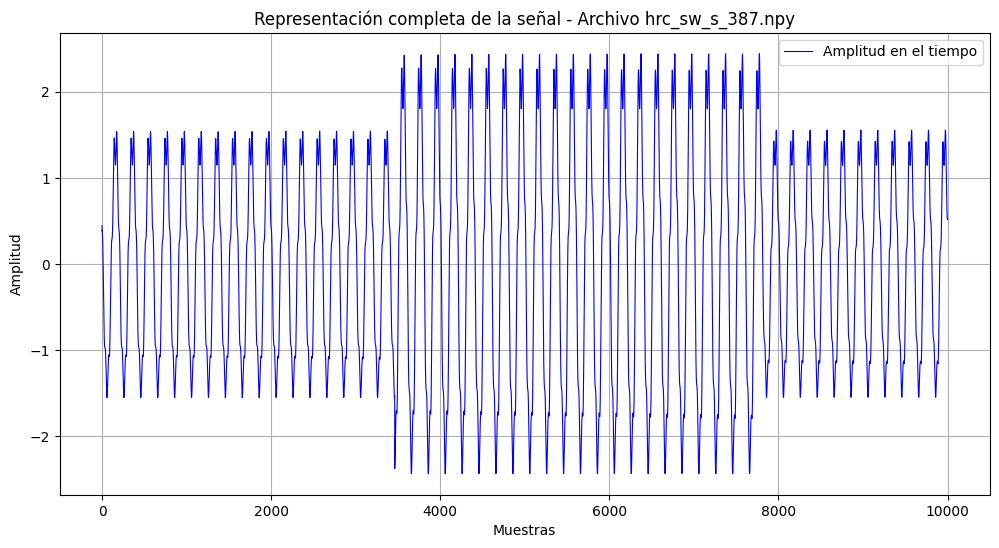

In [6]:
# Generar un número aleatorio entre 1 y 3600 para seleccionar el archivo
import random

archivo_numero = random.randint(1, 2000)
archivo_path = os.path.join(os.getcwd(), 'Harmonic_Swell_signals','train',f'hrc_sw_s_{archivo_numero}.npy')

# Cargar el archivo completo
signal_data = np.load(archivo_path)

# Graficar todos los datos de la señal
plt.figure(figsize=(12, 6))
plt.plot(signal_data, color='b', linestyle='-', linewidth=0.8, label='Amplitud en el tiempo')
plt.title(f"Representación completa de la señal - Archivo hrc_sw_s_{archivo_numero}.npy")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()